In [1]:
import nltk
import pandas as pd
import re
regex = re.compile('[^A-Za-zÀ-ÿ]')
import seaborn as sns
import numpy as np
import itertools
from tqdm import tqdm
from functools import reduce
import matplotlib.pyplot as plt
from collections import Counter

import itertools
import collections

import pickle

import matplotlib.pylab as plt

In [2]:
DIM_EMB=20

In [3]:
COOC_PATH = './cooc.pkl'
VOC_PATH = './vocab.pkl'
CUT_VOC_PATH = './vocab_cut.txt'
EMBEDDINGS_PATH = './embeddings.npy'
DATA_TRAIN_POS_PATH = './Datasets/twitter-datasets/pos_train.txt' 
DATA_TRAIN_NEG_PATH = './Datasets/twitter-datasets/neg_train.txt' 

In [4]:
RESULT_POS_PATH = './resPtrain_nd.txt'
RESULT_NEG_PATH = './resNtrain_nd.txt'

In [5]:
with open(COOC_PATH, 'rb') as f:
    cooc_matrix = pickle.load(f)
    
with open(VOC_PATH, 'rb') as f:
    vocabulary = pickle.load(f)
    
embeddings = np.load(EMBEDDINGS_PATH)

# load the data files = list with each line being a tweet
pos_data =open(DATA_TRAIN_POS_PATH, "r").read().splitlines()
neg_data =open(DATA_TRAIN_NEG_PATH, "r").read().splitlines()
cut_vocabulary =open(CUT_VOC_PATH, "r").read().splitlines()
result_pos =open(RESULT_POS_PATH, "r").read().splitlines()
result_neg =open(RESULT_NEG_PATH, "r").read().splitlines()

In [6]:
embeddings.shape

(13191, 20)

In [7]:
pos = [x.strip() for x in result_pos[0].split(',')]
neg = [x.strip() for x in result_neg[0].split(',')]

In [8]:
# get vocab equivalence to tweet words

idx_pos_tweets = [[vocabulary.get((regex.sub(' ', ' '.join(regex.sub(' ', t).split()))), -1) for t in line.strip().split()] for line in pos]
idx_pos_tweets = [[t for t in tokens if t>=0] for tokens in idx_pos_tweets]

idx_neg_tweets = [[vocabulary.get((regex.sub(' ', ' '.join(regex.sub(' ', t).split()))), -1) for t in line.strip().split()] for line in pos]
idx_neg_tweets = [[t for t in tokens if t>=0] for tokens in idx_neg_tweets]

# get dense vector equivalence to tweet words
pos_tweets_word_vector = [[embeddings[wd2voc][:] for wd2voc in tweet_words] for tweet_words in idx_pos_tweets]

neg_tweets_word_vector = [[embeddings[wd2voc][:] for wd2voc in tweet_words] for tweet_words in idx_neg_tweets]

# get mean word vector of each tweet
pos_tweets_mean_vector = [np.mean(wordvectors,axis=0) for wordvectors in pos_tweets_word_vector]

neg_tweets_mean_vector = [np.mean(wordvectors,axis=0) for wordvectors in neg_tweets_word_vector]

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [9]:
label_pos = [1] * len(pos)
pos_df = pd.DataFrame(list(zip(label_pos, pos, idx_pos_tweets,pos_tweets_word_vector,pos_tweets_mean_vector)),\
                      columns=["Sentiment","Tweet","Token_idx","Words_Vectors","Mean_Word_Vector"]) #create a df
del label_pos
pos_df.head()

,Sentiment,Tweet,Token_idx,Words_Vectors,Mean_Word_Vector
0,1,['dunno justin read mention justin god know ho...,"[1312, 439, 206, 459, 439, 140, 4, 45, 9, 209]","[[-0.14710372696628293, 1.086682084363625, -0....","[-0.35072209557061357, 0.7329244231493826, -0...."
1,1,'logic dumb even crop name photo tsk',"[2094, 1194, 68, 4664, 173, 309, 4455]","[[-1.556495316687639, 1.9481823643797989, -0.8...","[-0.39852621887554446, 0.2221294616363131, 0.0..."
2,1,'put casper box look battle bitch',"[156, 7907, 308, 25, 1357, 196]","[[-0.6393250135775723, -0.24818839004606633, -...","[0.03351917175659059, 0.09320186637661715, 0.0..."
3,1,'thanks sir trip lil mama keep doin',"[26, 1109, 525, 420, 856, 98, 1453]","[[-0.5080396613782544, 0.37463485113504796, -0...","[-0.2263552822782026, 0.5498975401627835, 0.19..."
4,1,'visit brother best birthday gift every',"[487, 271, 43, 91, 725, 172]","[[-0.47369600816379476, -0.30626771725887386, ...","[-0.2748481111946549, 0.14258626686447956, 0.0..."


In [10]:
label_neg = [-1] * len(neg)
neg_df = pd.DataFrame(list(zip(label_neg,neg, idx_neg_tweets,neg_tweets_word_vector,neg_tweets_mean_vector)),\
                      columns=["Sentiment","Tweet","Token_idx","Words_Vectors","Mean_Word_Vector"]) #create a df
del label_neg
neg_df.head(1000)

,Sentiment,Tweet,Token_idx,Words_Vectors,Mean_Word_Vector
0,-1,['vince tresorpack difficulty object disassemb...,"[1312, 439, 206, 459, 439, 140, 4, 45, 9, 209]","[[-0.14710372696628293, 1.086682084363625, -0....","[-0.35072209557061357, 0.7329244231493826, -0...."
1,-1,'glad dot take tomorrow thankful start',"[2094, 1194, 68, 4664, 173, 309, 4455]","[[-1.556495316687639, 1.9481823643797989, -0.8...","[-0.39852621887554446, 0.2221294616363131, 0.0..."
2,-1,'celtic regular season fuck play playoff',"[156, 7907, 308, 25, 1357, 196]","[[-0.6393250135775723, -0.24818839004606633, -...","[0.03351917175659059, 0.09320186637661715, 0.0..."
3,-1,'could actually kill girl sorry',"[26, 1109, 525, 420, 856, 98, 1453]","[[-0.5080396613782544, 0.37463485113504796, -0...","[-0.2263552822782026, 0.5498975401627835, 0.19..."
4,-1,'find hard believe afraid',"[487, 271, 43, 91, 725, 172]","[[-0.47369600816379476, -0.30626771725887386, ...","[-0.2748481111946549, 0.14258626686447956, 0.0..."
...,...,...,...,...,...
995,-1,'hope expensive',"[10, 1082, 540, 229, 9]","[[-0.4501262187043856, 0.39455591364676856, -0...","[-0.5294881894522154, 0.3331186413435129, 0.31..."
996,-1,'veto lift bring mcdonalds',"[193, 1995, 1785, 2010, 179, 3018, 331]","[[0.4379044107300885, 1.5083934849720537, -0.7...","[-0.0889891269310521, 0.4063476666019291, 0.08..."
997,-1,'want grow big fat like badly',"[605, 93, 216, 6, 896, 3268, 50]","[[-0.3091583487072667, 1.167363582424688, -0.4...","[-0.44712345374967594, 0.6397136345706483, -0...."
998,-1,'wake soo sad',[33],"[[-0.5223331548199615, 0.5166696367743184, -0....","[-0.5223331548199615, 0.5166696367743184, -0.4..."


---
Ligne suivante regroupe pos et neg

In [11]:
full_df = pd.concat([pos_df,neg_df],ignore_index=True) #regroup the dfs, ignore index in order to get new ones (->no duplicate)

full_df = full_df.sample(frac=1) #shuffles the rows

In [12]:
full_df["Mean_Word_Vector"].isna().sum()

208

In [13]:
full_df.shape

(171972, 5)

In [14]:
full_df

,Sentiment,Tweet,Token_idx,Words_Vectors,Mean_Word_Vector
1596,1,'die hair weekend doe',"[208, 159, 137, 1138]","[[-0.2297547062249687, 1.0056710705249106, -0....","[-0.2926478669259568, 0.7304745161865882, -0.4..."
164059,-1,'senior year near grow',"[2865, 868, 2380, 1047, 2380, 1047, 1968]","[[-0.018562126522129692, 1.4840081097544238, 0...","[-0.2737196539411202, -0.6308654885139059, 0.5..."
37206,1,'see fund like lol',"[11, 1851, 2, 7]","[[-0.40917844466549524, 0.3867994960359384, -0...","[-0.25716206578343326, 0.10525429149759227, 0...."
40902,1,'get rio ferdinand steven gerrard david villa ...,"[0, 4489, 4466, 12674, 1224, 4823, 74]","[[-0.4641674500250573, 0.42570638782998044, -0...","[-0.4530348220386679, 0.29234446776510825, -0...."
167107,-1,'know believer paperback heart call peace mind...,"[4, 99, 42, 5768, 190, 53, 596, 6531, 3, 3613,...","[[-0.5017037980099875, 0.4028680756526846, -0....","[-0.536334212217483, -0.07119080982563594, -0...."
...,...,...,...,...,...
142292,-1,'order dinner theatre sadly strippers combo ve...,"[178, 358, 0, 360, 1311, 136, 381, 1695]","[[-0.5470598001889815, 0.5186793625283458, -0....","[-0.15914579649840271, 0.22836361932879712, -0..."
20703,1,'miss hope everything well',"[12, 45, 149, 22]","[[-0.4647385385750979, 0.3672164589161375, -0....","[-0.5654493962174141, 0.4544491980022023, -0.3..."
45498,1,'well plan win',"[22, 299, 234]","[[-0.5890456639014277, 0.41502861026588084, -0...","[0.16082736740894915, 0.25556636070164035, 0.2..."
163570,-1,'sole fit series low sole men sole fit series ...,"[1425, 140, 4073, 14, 157, 54, 2205, 58]","[[0.027479598154090023, -0.4158455610053582, -...","[-0.17195207097829535, 0.1201990129572699, -0...."


In [15]:
tab = full_df.dropna()

In [16]:
tab.shape[0]

171764

In [17]:
X = tab['Mean_Word_Vector'].to_numpy()

In [18]:
import numpy

In [19]:
X

array([array([-0.29264787,  0.73047452, -0.42461062,  0.52196215, -0.39646375,
        0.5972998 ,  0.66486049, -0.02390662, -0.09687813,  0.45369475,
       -0.25474605,  0.11701357,  0.82950266,  0.04180876, -0.23475479,
        0.25060575,  0.2600258 , -0.50668167, -0.20000294, -0.37285665]),
       array([-0.27371965, -0.63086549,  0.51023501,  0.13806856, -0.16720494,
       -0.06730992,  0.21807935,  0.13326778,  0.13440158, -0.74322189,
        0.31260486,  0.64764957, -0.57638868,  0.26253406, -0.38300574,
       -0.26708007,  0.31698228, -0.27602042, -0.46362601, -0.81602833]),
       array([-0.25716207,  0.10525429,  0.07350393,  0.4998781 , -1.0938133 ,
        0.05714913,  0.07549981, -0.27838917,  0.17366801,  0.08881881,
       -0.0203276 ,  0.05174633,  0.93164187,  0.056918  ,  0.25479397,
       -0.48165137,  0.50712602,  0.10679844,  0.1742761 , -0.2316474 ]),
       ...,
       array([ 0.16082737,  0.25556636,  0.2813804 ,  0.44126723, -0.55274055,
        0.35133014

In [20]:
X = numpy.concatenate(X, axis=0).reshape((tab.shape[0],DIM_EMB))

In [21]:
X

array([[-0.29264787,  0.73047452, -0.42461062, ..., -0.50668167,
        -0.20000294, -0.37285665],
       [-0.27371965, -0.63086549,  0.51023501, ..., -0.27602042,
        -0.46362601, -0.81602833],
       [-0.25716207,  0.10525429,  0.07350393, ...,  0.10679844,
         0.1742761 , -0.2316474 ],
       ...,
       [ 0.16082737,  0.25556636,  0.2813804 , ...,  0.40732355,
         0.03047549, -0.31973123],
       [-0.17195207,  0.12019901, -0.14179686, ...,  0.17236292,
         0.20334473, -0.25468307],
       [-0.51447221,  0.20379426, -0.49815   , ...,  0.07400272,
         0.07096474, -0.35284342]])

In [22]:
X.shape

(171764, 20)

In [23]:
y = tab['Sentiment'].to_numpy()
y
y.shape

(171764,)

In [24]:
from SVM import *
from CV import *

In [26]:
w = sgd_for_svm_demo(y, X)

iteration=0, cost=27369665433.64282
iteration=10000, cost=403574471.54484993
iteration=20000, cost=215597632.54432994
iteration=30000, cost=103922341.19558522
iteration=40000, cost=30062371.470410515
iteration=50000, cost=632571.8149719834
iteration=60000, cost=351681.1905302922
iteration=70000, cost=443215.208541706
iteration=80000, cost=527436.5551553133
iteration=90000, cost=266153.90236405656
training accuracy = 0.5


iteration=0, cost=15683537271.456507
iteration=10000, cost=1420668706.3807883
iteration=20000, cost=1195371715.4725015
iteration=30000, cost=1070377450.2284117
iteration=40000, cost=979999827.2115793
iteration=50000, cost=909895818.8092649
iteration=60000, cost=853335327.9331102
iteration=70000, cost=807947762.2181923
iteration=80000, cost=767593495.7890745
iteration=90000, cost=731634550.5699197
training accuracy = 0.5
iteration=0, cost=21545004331.43852
iteration=10000, cost=846569026.4115797
iteration=20000, cost=634162888.0242994
iteration=30000, cost=508287528.20125425
iteration=40000, cost=421596534.3911786
iteration=50000, cost=355283498.1200663
iteration=60000, cost=302713773.8249933
iteration=70000, cost=258612317.14082417
iteration=80000, cost=220459303.71792772
iteration=90000, cost=188227755.06714365
training accuracy = 0.5
iteration=0, cost=19988930223.459476
iteration=10000, cost=819105915.7934006
iteration=20000, cost=592370862.4081739
iteration=30000, cost=459167512.730

iteration=60000, cost=1125159836.3499367
iteration=70000, cost=1073303809.5582883
iteration=80000, cost=1028449279.1435231
iteration=90000, cost=988305127.3264039
training accuracy = 0.5
iteration=0, cost=21517280425.327915
iteration=10000, cost=961630583.65229
iteration=20000, cost=749632384.9174958
iteration=30000, cost=623629474.976388
iteration=40000, cost=535771103.9617633
iteration=50000, cost=470141141.7101585
iteration=60000, cost=416376803.1915171
iteration=70000, cost=370443386.0734105
iteration=80000, cost=331207068.667584
iteration=90000, cost=297260772.49780643
training accuracy = 0.5
iteration=0, cost=17777636961.13789
iteration=10000, cost=2853019946.8767447
iteration=20000, cost=2603252032.030934
iteration=30000, cost=2459524693.7959714
iteration=40000, cost=2360667401.902508
iteration=50000, cost=2283365788.930005
iteration=60000, cost=2219643968.139384
iteration=70000, cost=2166448332.241136
iteration=80000, cost=2119927329.0412984
iteration=90000, cost=2079356543.905

iteration=10000, cost=1526662758.642103
iteration=20000, cost=1310647748.2288833
iteration=30000, cost=1186063948.1994731
iteration=40000, cost=1100115291.6988733
iteration=50000, cost=1034393795.165688
iteration=60000, cost=980003745.428103
iteration=70000, cost=933847943.6216183
iteration=80000, cost=894251978.9963737
iteration=90000, cost=858032961.2489663
training accuracy = 0.5
iteration=0, cost=29597504523.955933
iteration=10000, cost=237821653.09153646
iteration=20000, cost=25404179.01772111
iteration=30000, cost=825522.5382757267
iteration=40000, cost=745545.4107249231
iteration=50000, cost=541626.8513670439
iteration=60000, cost=411338.03797084925
iteration=70000, cost=280852.98584196036
iteration=80000, cost=403749.82067237375
iteration=90000, cost=353508.12876501284
training accuracy = 0.5
iteration=0, cost=14127727357.450861
iteration=10000, cost=1500738195.7115967
iteration=20000, cost=1276217286.4101105
iteration=30000, cost=1147178624.8164785
iteration=40000, cost=105596

iteration=70000, cost=1136492009.5418715
iteration=80000, cost=1094929341.9021752
iteration=90000, cost=1057261340.0948656
training accuracy = 0.5
iteration=0, cost=26752686465.395943
iteration=10000, cost=422476397.7704912
iteration=20000, cost=212715481.97252694
iteration=30000, cost=90996277.62749556
iteration=40000, cost=11297052.785047831
iteration=50000, cost=487959.4057494588
iteration=60000, cost=456763.9532076987
iteration=70000, cost=346240.5139467566
iteration=80000, cost=382487.18964648264
iteration=90000, cost=330105.3503245578
training accuracy = 0.5


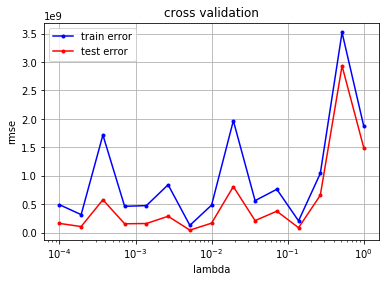

In [27]:
cross_validation_demo(y, X)